In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/Car dekho.csv")
df

,Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Alto 800 LXI Opt,2023,410000,10000,Petrol,Individual,Manual,First Owner,19.03 kmpl,999 CC,71.01bhp,96Nm,5.0
1,Skoda Slavia 1.0 TSI Ambition,2023,1350000,10000,Petrol,Individual,Manual,First Owner,14.08 kmpl,1956 CC,167.67bhp,350nm,5.0
2,BMW 3 Series Gran Limousine 320Ld Luxury Line,2023,5800000,1000,Diesel,Dealer,Automatic,First Owner,18.15 kmpl,998 CC,118.35bhp,172Nm,5.0
3,MG ZS EV Exclusive,2023,2650000,10000,Electric,Dealer,Automatic,First Owner,32.52 kmpl,998 CC,58.33bhp,78Nm,5.0
4,Tata Punch Adventure,2023,715000,10000,Petrol,Individual,Manual,First Owner,12.15 kmpl,1451 CC,141bhp,250Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8143,Ambassador Classic 2000 DSZ AC PS,1994,99000,100000,Diesel,Individual,Manual,Second Owner,12.8 kmpl,1995 CC,52 bhp,106Nm@ 2200rpm,5.0
8144,Mahindra Jeep CL 500 MDI,1994,120000,100000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8145,Maruti 800 AC,1994,45000,60000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8146,Maruti Omni LPG STD BSIV,1991,55000,120000,LPG,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df["mileage"] = df["mileage"].str.strip(" kmplg/")
df["mileage"] = df["mileage"].astype(float)

df["engine"] = df["engine"].str.strip(" C")
df["engine"] = df["engine"].astype(int)

df["max_power"] = df["max_power"].str.strip(" bhp")
df["max_power"] = df["max_power"].astype(float)

df["torque"] = df["torque"].apply(func = lambda x : x.upper().split()[0])
df["torque"] = df["torque"].apply(func = lambda x : x.upper().split("N")[0])
df["torque"] = df["torque"].apply(func = lambda x : x.upper().split("K")[0])
df["torque"] = df["torque"].apply(func = lambda x : x.upper().split("@")[0])
df["torque"] = df["torque"].apply(func = lambda x : x.upper().split("(")[0])
df["torque"] = df["torque"].astype(float)

df.reset_index(drop=True, inplace=True)

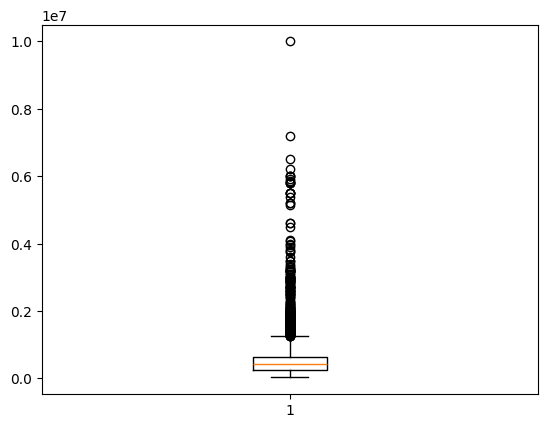

In [ ]:
plt.boxplot(df["selling_price"])
plt.show()

In [ ]:
plt.figure(figsize = (5, 4))
plt.bar(x = df["fuel"].value_counts().index, height = df["fuel"].value_counts())
plt.title("Fuel Count Stats")
plt.xlabel("Fuel Types")
# plt.xticks(rotation = 60)
plt.ylabel("Count")
# plt.yticks(rotation = 60)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
for i in df:
  if df[i].dtype == "object" and df[i].nunique() <= 35:
    plt.bar(x = df[i].value_counts().index, height = df[i].value_counts())
    plt.xlabel(i)
    plt.xticks(rotation = 90)
    plt.ylabel("Count")
    plt.show()
  print()

In [ ]:
for i in df:
  if df[i].dtype == "int" or df[i].dtype == "float":
    plt.title(i)
    plt.hist(df[i])
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.show()
  print()

In [ ]:
df.corr(numeric_only = True)

In [ ]:
num = []
obj = []
for i in df:
  if df[i].dtype == "float" or df[i].dtype == "int":
    num.append(i)
  elif df[i].dtype == "object":
    obj.append(i)
print("Numerical Columns:",num)
print("Object Columns:",obj)

In [ ]:
# yesterday class programs pending

In [ ]:
x = [3,2,1,5,1,2]
y = [3,2,1,4,10,1]
plt.figure(figsize=(4,3))
plt.scatter(x,y)
plt.show()

In [ ]:
plt.scatter(df["year"], df["selling_price"])
plt.title("Year vs Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

In [ ]:
for i in num:
  for j in num:
    if i != j:
      plt.scatter(df[i], df[j])
      plt.title = i + " vs " + j
      plt.xlabel = i
      plt.ylabel = j
      plt.show()
      print()

In [ ]:
df.describe()

In [ ]:
q1 = df["selling_price"].quantile(0.25)
q2 = df["selling_price"].quantile(0.50)
q3 = df["selling_price"].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
print("Q1:",q1)
print("Q2:",q2)
print("Q3:",q3)
print("IQR:",iqr)
print("Upper Bound:",upper_bound)
print("Lower Bound:",lower_bound)
df = df[df["selling_price"] > lower_bound]

In [ ]:
df

In [ ]:
q1 = df["km_driven"].quantile(0.25)
q3 = df["km_driven"].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr
print("Q1:",q1)
print("Q3:",q3)
print("IQR:",iqr)
print("Upper:",upper_bound)
print("Lower:",lower_bound)
df = df[(df["km_driven"] > lower_bound) & (df["km_driven"] < upper_bound)]

In [ ]:
# q1 = df["mileage"].quantile(0.25)
# q3 = df["mileage"].quantile(0.75)
# iqr = q3 - q1
# upper_bound = q3 + 1.5 * iqr
# lower_bound = q1 - 1.5 * iqr
# print("Q1:",q1)
# print("Q3:",q3)
# print("IQR:",iqr)
# print("Upper:",upper_bound)
# print("Lower:",lower_bound)
# df = df[(df["mileage"] > lower_bound) & (df["mileage"] < upper_bound)]

In [ ]:
year = df.groupby("year")["selling_price"].mean()
plt.plot(year.index, year.values)
plt.title("Year vs Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()